In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/Users/dehilinesma/Downloads/4 - Bank Deposits.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,-1.0,0,unknown,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,may,113,1,-1.0,0,unknown,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,may,620,1,-1.0,0,unknown,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,apr,472,2,-1.0,0,unknown,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,may,107,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,NaN,4,other,no
2324,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,NaN,1,success,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,NaN,1,success,yes
2326,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1.0,0,unknown,yes


In [3]:
data.dtypes

age                                   int64
job                                  object
marital                              object
education                            object
default                              object
balance                               int64
housing                              object
loan                                 object
contact                              object
day                                   int64
month                                object
duration                              int64
campaign                              int64
pdays                               float64
previous                              int64
poutcome                             object
Subscription to deposit (target)     object
dtype: object

### At this stage we checked if we had misstyping issues with non numerical data

In [4]:
for col in data:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible age
26    881
25    571
24    326
23    222
22    138
21     86
20     53
19     39
18     12
Name: age, dtype: int64

Frequency of Categories for varible job
student          549
blue-collar      481
technician       306
admin.           293
services         281
management       236
unemployed        62
self-employed     60
entrepreneur      36
housemaid         15
unknown            5
retired            4
Name: job, dtype: int64

Frequency of Categories for varible marital
single      1886
married      407
divorced      30
no             1
Name: marital, dtype: int64

Frequency of Categories for varible education
secondary    1492
tertiary      537
primary       167
unknown       127
Name: education, dtype: int64

Frequency of Categories for varible default
no     2274
yes      54
Name: default, dtype: int64

Frequency of Categories for varible balance
0       103
2        12
3        11
1        10
5        10
       ... 
2532      1
1370      1


In [5]:
data.duplicated().any()

True

In [6]:
data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,-1.0,0,unknown,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,may,113,1,-1.0,0,unknown,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,may,620,1,-1.0,0,unknown,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,apr,472,2,-1.0,0,unknown,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,may,107,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,NaN,4,other,no
2324,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,NaN,1,success,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,NaN,1,success,yes
2326,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1.0,0,unknown,yes


### We proceeded in finding outliers 

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2328.000000,2.328000e+03,2328.000000,2328.000000,2328.000000,2323.000000,2328.000000
mean,24.471649,5.255143e+03,21.123282,275.316151,2.446306,35.482996,0.503866
std,1.780876,2.072469e+05,248.680549,244.516521,3.370369,92.897891,1.585816
min,18.000000,-8.019000e+03,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,24.000000,7.600000e+01,8.000000,113.000000,1.000000,-1.000000,0.000000
50%,25.000000,3.505000e+02,15.000000,206.500000,2.000000,-1.000000,0.000000
75%,26.000000,1.003250e+03,24.000000,354.250000,3.000000,-1.000000,0.000000
max,26.000000,1.000000e+07,12000.000000,1992.000000,58.000000,485.000000,29.000000


In [8]:
data[(data['campaign']==58)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
1574,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1.0,0,unknown,no


In [9]:
data[(data['duration']==1992)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
273,26,technician,divorced,tertiary,no,-70,no,yes,unknown,1,jul,1992,2,-1.0,0,unknown,no


In [10]:
data[(data['balance']== 1.000000e+07)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
16,26,management,single,tertiary,no,10000000,no,no,unknown,26,may,111,1,-1.0,0,unknown,no


In [11]:
data[(data['balance']== -8.019000e+03)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
285,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1.0,0,unknown,no


In [12]:
data[(data['day']>31)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
1576,24,management,married,secondary,no,867,yes,no,unknown,430,jun,546,10,-1.0,0,unknown,yes
1589,24,student,single,secondary,no,1250,no,no,cellular,12000,mar,411,2,-1.0,0,unknown,yes


### We later decided to drop the maximum balance as it was altering the values and changing the days with the median day

In [13]:
data[(data['day']>31)]
data.at[1576,'day']=15
data.at[1589,'day']=15

In [14]:
data=data.drop([16])

In [15]:
data=data.drop([285])

### Locate empty cells and changing them 

In [16]:
data.isna().sum()

age                                 0
job                                 0
marital                             4
education                           5
default                             0
balance                             0
housing                             0
loan                                0
contact                             7
day                                 0
month                               0
duration                            0
campaign                            0
pdays                               5
previous                            0
poutcome                            0
Subscription to deposit (target)    0
dtype: int64

## Filling empty cells 
### Finding the strategy of filling the empty cells 
#### We replayced by single since the profiles were 18yo students

In [17]:

data[data['marital'].isnull()]
data[(data['age']== 18) & (data['marital'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
2320,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1.0,0,unknown,no
2321,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,NaN,0,unknown,yes
2322,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,NaN,0,unknown,yes
2323,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,NaN,4,other,no
2324,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,NaN,1,success,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,NaN,1,success,yes
2326,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1.0,0,unknown,yes
2327,18,student,single,unknown,no,438,no,no,cellular,1,sep,425,1,-1.0,0,unknown,no


In [18]:
data['marital'].fillna('single', inplace=True)

In [19]:
data[(data['poutcome']=='unknown') & (data['pdays']== -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,-1.0,0,unknown,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,may,113,1,-1.0,0,unknown,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,may,620,1,-1.0,0,unknown,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,apr,472,2,-1.0,0,unknown,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,may,107,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1.0,0,unknown,yes
2319,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1.0,0,unknown,no
2320,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1.0,0,unknown,no
2326,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1.0,0,unknown,yes


#### Instead of nan we replayced with unknown for both education and contact


In [20]:
data[data['education'].isnull()]
data['education'].fillna('unknown', inplace=True)

In [21]:
data[data['contact'].isnull()]
data['contact'].fillna('unknown', inplace=True)

#### When it came to pdays: We first proceeded in finding that all unknown in 'poutcome' are -1 in 'pdays'

In [22]:
data[data['pdays'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
2321,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,NaN,0,unknown,yes
2322,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,NaN,0,unknown,yes
2323,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,NaN,4,other,no
2324,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,NaN,1,success,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,NaN,1,success,yes


In [23]:
data[(data['poutcome']=='unknown') & (data['pdays']== -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,-1.0,0,unknown,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,may,113,1,-1.0,0,unknown,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,may,620,1,-1.0,0,unknown,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,apr,472,2,-1.0,0,unknown,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,may,107,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1.0,0,unknown,yes
2319,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1.0,0,unknown,no
2320,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1.0,0,unknown,no
2326,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1.0,0,unknown,yes


#### When it came to success and others, we replayced by the mean of the data in same range 

In [24]:
pdays=data[(data['poutcome']=='success') & (data['pdays'])]
pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
12,26,admin.,single,secondary,no,255,no,no,cellular,30,apr,457,1,80.0,1,success,yes
62,26,student,single,tertiary,no,294,no,no,cellular,5,mar,87,1,91.0,2,success,yes
543,26,self-employed,single,secondary,no,1242,yes,no,cellular,5,feb,205,2,253.0,2,success,no
595,26,blue-collar,single,primary,no,52,yes,no,cellular,20,apr,271,1,300.0,2,success,no
609,26,admin.,single,secondary,no,255,no,no,cellular,30,apr,457,1,80.0,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,19,student,single,primary,no,103,no,no,cellular,15,oct,96,2,97.0,2,success,no
2306,19,student,single,unknown,no,108,no,no,cellular,9,mar,273,2,182.0,1,success,yes
2308,19,student,single,secondary,no,329,no,no,cellular,30,apr,169,1,190.0,2,success,yes
2309,19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180.0,2,success,yes


In [25]:
pdays.describe()

,age,balance,day,duration,campaign,pdays,previous
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,23.937500,1107.491071,15.241071,273.973214,1.794643,135.821429,2.767857
std,2.054576,2497.024193,9.012749,178.125953,1.501581,58.093000,2.176791
min,19.000000,-67.000000,1.000000,68.000000,1.000000,50.000000,1.000000
25%,22.750000,215.000000,8.000000,163.000000,1.000000,92.000000,1.000000
50%,24.000000,471.500000,13.000000,236.000000,1.000000,102.500000,2.000000
75%,26.000000,1234.000000,24.000000,328.000000,2.000000,182.000000,3.000000
max,26.000000,23878.000000,30.000000,1178.000000,11.000000,350.000000,12.000000


In [26]:
data.at[2321,'pdays']=-1
data.at[2322,'pdays']=-1
data.at[2323,'pdays']=135
data.at[2324,'pdays']=135
data.at[2325,'pdays']=135

### Checking that the code ran correctly 

In [27]:
data.isna().sum()

age                                 0
job                                 0
marital                             0
education                           0
default                             0
balance                             0
housing                             0
loan                                0
contact                             0
day                                 0
month                               0
duration                            0
campaign                            0
pdays                               0
previous                            0
poutcome                            0
Subscription to deposit (target)    0
dtype: int64

In [28]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,24.470335,963.883061,15.796217,275.376612,2.446690,35.611350,0.504299
std,1.781078,2043.794915,8.787758,244.597428,3.371665,92.906647,1.586429
min,18.000000,-1414.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,24.000000,76.000000,8.000000,113.000000,1.000000,-1.000000,0.000000
50%,25.000000,350.500000,15.000000,206.500000,2.000000,-1.000000,0.000000
75%,26.000000,1003.000000,23.000000,354.750000,3.000000,-1.000000,0.000000
max,26.000000,24299.000000,31.000000,1992.000000,58.000000,485.000000,29.000000


## Exporting the file to MySQL 

In [29]:
#data.to_csv('/Users/dehilinesma/Downloads/Bank deposit - Before encoding1 .csv')

## Label Encoding 

In [30]:
month_labels = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
data['month'] = data['month'].apply(lambda x: month_labels[x])

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,5,425,1,-1.0,0,unknown,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,5,113,1,-1.0,0,unknown,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,5,620,1,-1.0,0,unknown,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,4,472,2,-1.0,0,unknown,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,5,107,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,student,single,secondary,no,156,no,no,cellular,4,11,298,2,135.0,4,other,no
2324,18,student,single,primary,no,608,no,no,cellular,13,11,210,1,135.0,1,success,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,2,92,1,135.0,1,success,yes
2326,18,student,single,unknown,no,348,no,no,cellular,5,5,443,4,-1.0,0,unknown,yes


In [31]:
poutcome_labels = {'unknown': 0, 'failure': 1,'other': 2, 'success': 3}
data['poutcome'] = data['poutcome'].apply(lambda x: poutcome_labels[x])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,unknown,21,5,425,1,-1.0,0,0,no
1,26,unemployed,single,secondary,no,1064,no,no,unknown,31,5,113,1,-1.0,0,0,no
2,26,student,single,secondary,no,2572,yes,no,cellular,5,5,620,1,-1.0,0,0,no
3,26,technician,single,tertiary,no,1216,yes,no,cellular,16,4,472,2,-1.0,0,0,no
4,26,technician,married,tertiary,no,3825,yes,no,unknown,13,5,107,1,-1.0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,student,single,secondary,no,156,no,no,cellular,4,11,298,2,135.0,4,2,no
2324,18,student,single,primary,no,608,no,no,cellular,13,11,210,1,135.0,1,3,yes
2325,18,student,single,unknown,no,108,no,no,cellular,9,2,92,1,135.0,1,3,yes
2326,18,student,single,unknown,no,348,no,no,cellular,5,5,443,4,-1.0,0,0,yes


In [32]:
contact_labels = {'unknown': 0, 'cellular': 1,'telephone': 2,}
data['contact'] = data['contact'].apply(lambda x: contact_labels[x])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,blue-collar,married,primary,no,0,yes,no,0,21,5,425,1,-1.0,0,0,no
1,26,unemployed,single,secondary,no,1064,no,no,0,31,5,113,1,-1.0,0,0,no
2,26,student,single,secondary,no,2572,yes,no,1,5,5,620,1,-1.0,0,0,no
3,26,technician,single,tertiary,no,1216,yes,no,1,16,4,472,2,-1.0,0,0,no
4,26,technician,married,tertiary,no,3825,yes,no,0,13,5,107,1,-1.0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,student,single,secondary,no,156,no,no,1,4,11,298,2,135.0,4,2,no
2324,18,student,single,primary,no,608,no,no,1,13,11,210,1,135.0,1,3,yes
2325,18,student,single,unknown,no,108,no,no,1,9,2,92,1,135.0,1,3,yes
2326,18,student,single,unknown,no,348,no,no,1,5,5,443,4,-1.0,0,0,yes


### Running a quick analysis on the data to check if the results are consistent 

<AxesSubplot:>

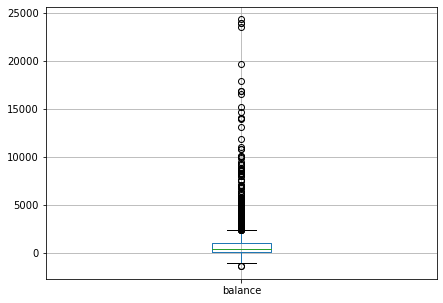

In [46]:
plt.figure(figsize=(7, 5))
data.boxplot(column=['balance'])

## Automatic encoding 

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


for i in data:
    if data[i].dtype=="object":
        print(i)
        data[i]=encoder.fit_transform(data[i])
data

job
marital
education
default
housing
loan
Subscription to deposit (target)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
0,26,1,1,0,0,0,1,0,0,21,5,425,1,-1.0,0,0,0
1,26,10,3,1,0,1064,0,0,0,31,5,113,1,-1.0,0,0,0
2,26,8,3,1,0,2572,1,0,1,5,5,620,1,-1.0,0,0,0
3,26,9,3,2,0,1216,1,0,1,16,4,472,2,-1.0,0,0,0
4,26,9,1,2,0,3825,1,0,0,13,5,107,1,-1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,18,8,3,1,0,156,0,0,1,4,11,298,2,135.0,4,2,0
2324,18,8,3,0,0,608,0,0,1,13,11,210,1,135.0,1,3,1
2325,18,8,3,3,0,108,0,0,1,9,2,92,1,135.0,1,3,1
2326,18,8,3,3,0,348,0,0,1,5,5,443,4,-1.0,0,0,1


In [35]:
df=data.corr()
df.round(decimals = 2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription to deposit (target)
age,1.00,-0.19,-0.16,-0.01,0.06,0.02,0.13,0.13,-0.06,0.07,-0.10,0.08,0.03,-0.04,-0.05,-0.09,-0.12
job,-0.19,1.00,0.15,0.16,-0.04,0.09,-0.22,-0.08,0.15,-0.03,0.07,-0.02,0.00,0.02,0.04,0.08,0.10
marital,-0.16,0.15,1.00,0.09,-0.09,0.08,-0.24,-0.12,0.16,-0.05,0.02,-0.04,-0.05,0.04,0.05,0.10,0.13
education,-0.01,0.16,0.09,1.00,-0.05,0.08,-0.17,-0.06,0.10,0.00,-0.02,-0.02,-0.06,-0.01,-0.01,0.01,0.06
default,0.06,-0.04,-0.09,-0.05,1.00,-0.09,0.07,0.13,-0.06,0.01,0.01,-0.02,0.02,-0.04,-0.04,-0.05,-0.04
balance,0.02,0.09,0.08,0.08,-0.09,1.00,-0.07,-0.09,0.06,-0.00,-0.01,-0.00,-0.04,0.00,0.03,0.03,0.04
housing,0.13,-0.22,-0.24,-0.17,0.07,-0.07,1.00,0.04,-0.42,0.02,-0.16,0.02,0.06,0.03,-0.07,-0.15,-0.28
loan,0.13,-0.08,-0.12,-0.06,0.13,-0.09,0.04,1.00,-0.05,-0.00,0.04,0.03,0.06,-0.06,-0.06,-0.10,-0.09
contact,-0.06,0.15,0.16,0.10,-0.06,0.06,-0.42,-0.05,1.00,-0.05,0.07,-0.00,-0.02,0.22,0.18,0.24,0.19
day,0.07,-0.03,-0.05,0.00,0.01,-0.00,0.02,-0.00,-0.05,1.00,-0.10,-0.02,0.13,-0.05,-0.04,-0.04,0.01


## Decision Tree implementation 

In [36]:
data.columns
feature_cols = ['age', 'job','marital','education','default','balance', 'housing','loan','contact','day','previous','poutcome']

features=data[feature_cols]
target=data["Subscription to deposit (target)"]


In [37]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [38]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [39]:
clf0 = DecisionTreeClassifier(max_depth=2)
model = clf0.fit(x_train, y_train)
text_representation = tree.export_text(clf0)

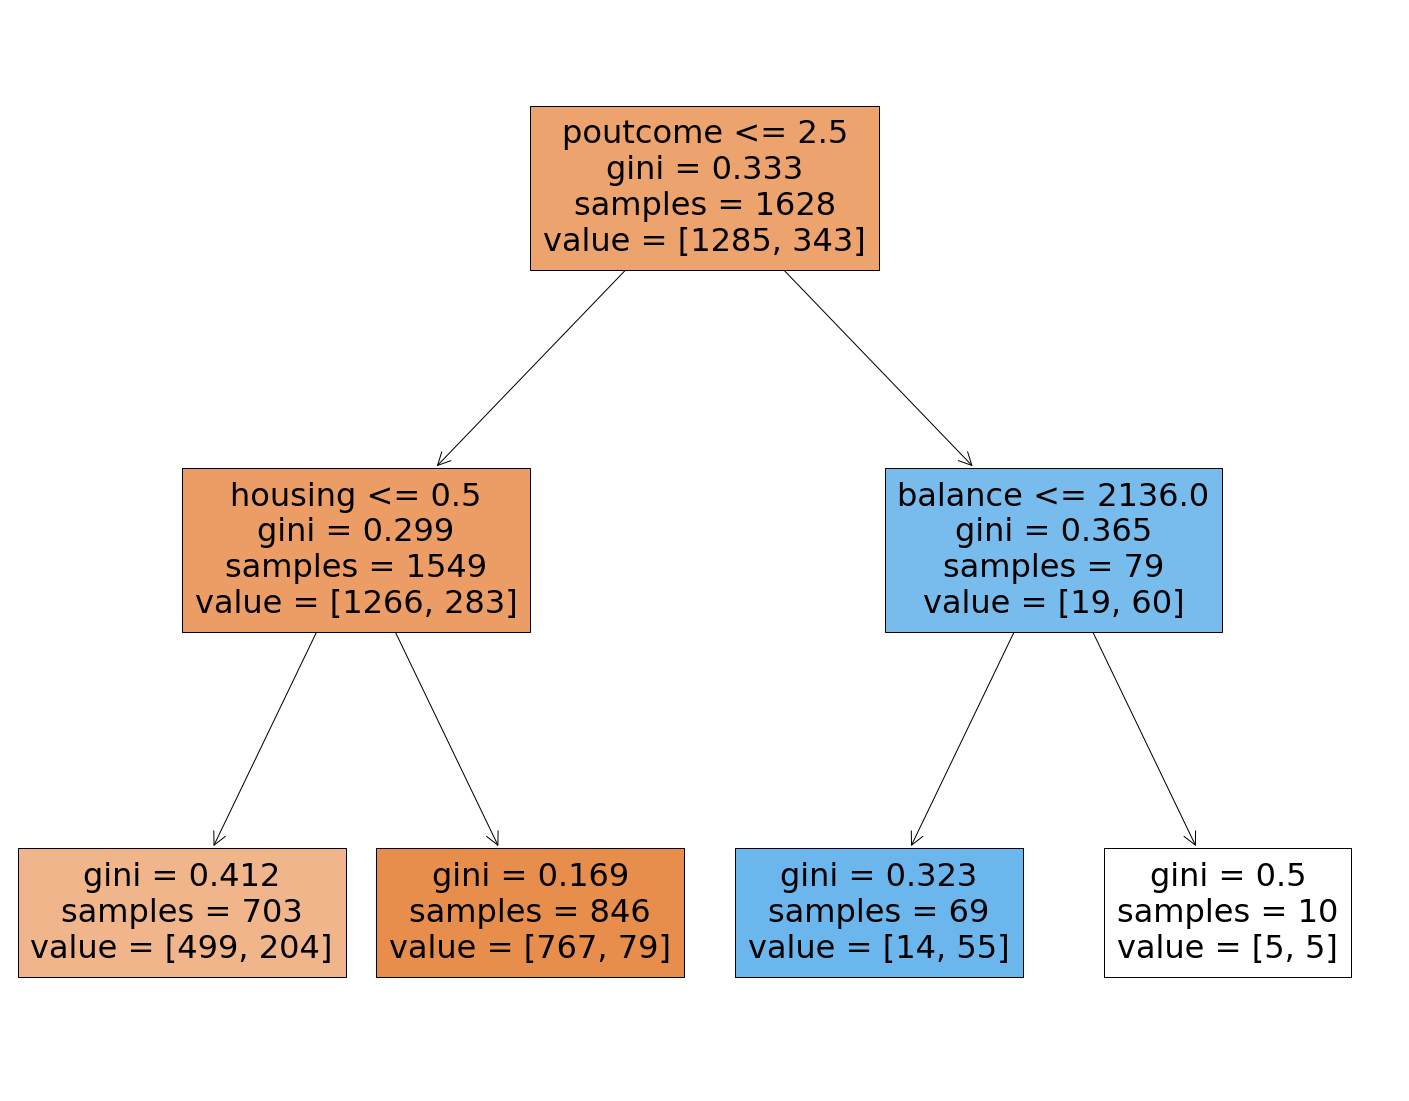

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf0, 
                   feature_names=feature_cols,  
    
                   filled=True)
fig.savefig("decistion_tree.png")

In [47]:
#data.to_csv('/Users/dehilinesma/Downloads/Bank deposit - Final version.csv')